# Chapter 2. Training Machine Learning Algorithms for Classification

앞서 supervised learning을 설명하면서       
label이 범주형 변수일 경우 <u>Classification</u> problem이고,      
label이 연속형 변수일 경우 <u>Regression</u> problem이라고 했었다.

Chapter2에서는 <u>Classification</u> 알고리즘 중 (아주) 고전이라고 할 수 있는        
**Perceptrons**와 **Adaptive linear neurans**에 대해서 알아보고,        
기본적인 최적화(optimization) 기법에 대해서도 알아본다.     
(Classification problem에 대한 connectionist적 관점에서의 접근)

### 2.1 Perceptrons

###### Artificial neurons

> An **artificial neuron** is a <u>mathematical function</u> conceived as a model of <u>biological neurons</u>. Artificial neurons are the constitutive units in an artificial neural network. Depending on the specific model used they may be called a <u>semi-linear unit, Nv neuron, binary neuron, linear threshold function, or McCulloch–Pitts (MCP) neuron.</u>
<div align="right">Reference: https://en.wikipedia.org/wiki/Artificial_neuron</div>

'어떤 입력들이 들어오고 이들을 종합하여 어떤 출력을 내놓는 것'을 표현할 수 있는 다양한 방법이 있다. 우선 수학적으로는 y = f(x1, x2, ..., xp)와 같은 함수를 생각해볼 수 있다.

인공지능과 뇌과학 분야에서는 두뇌에서 일어나는 연산/판단 과정을 알아내기 위해 다양한 시도를 했는데, 뉴런을 어떤 수학적 함수로 표현하는 하는 것도 그런 시도들 중 하나였다.

<img  src="./_images/02_artificial_neurons.PNG"/>

이렇게 생물학적 neuron을 수학적 함수로 표현하는 시도 중 하나가 **Artificial neuron**인데, Warren McCullock and Walter Pits가 1943년 고안한 것으로 **McCulloch–Pitts (MCP) neuron**이라고도 부른다.(멕컬릭 엔 핏츠 뉴런)

artificial neuron에 대한 기본 아이디어는 뉴런이 여러 다양한 입력을 받아 어떤 계산을 하고 그 계산의 합(혹은 함수의 출력값)이 어떤 임계치보다 크면 어떤 1을 내보내고, 임계치($\theta$) 보다 작을 경우 -1을 출력으로 내보내는 것이다.

이것을 수학적으로 표현하면 하나의 뉴런에 들어오는 다양한 입력 각각을 $x_1, x_2, \dots, x_p$이라 하고        
이들의 연산이 단순히 가중합(weighted sum)이라 가정하면 그 연산 합은 아래와 같다.
$$z = x_1 w_1 + x_2 w_2 + \dots + x_p w_p$$

이때 z가 임계치를 넘느냐 넘지 않느냐에 따라 아래와 같이 표현할 수 있다. 
$$z = \sum_{i} x_i w_i$$   
$$\phi(z) = \begin{cases} 1 & \rm{if} ~ z \geq \theta \\ -1 & \rm{otherwise}
\end{cases}$$

혹은 임계치를 bias로 바꿔서 표현할 수 도 있다.($\theta = -b$)    
$$z = b + \sum_{i} x_i w_i$$   
$$\phi(z) = \begin{cases} 1 & \rm{if} ~ z \geq 0 \\ -1 & \rm{otherwise}
\end{cases}$$


이를 그래프로 아래와 같이 나타낼 수 있다. 
이런 판단을 하는 함수를 activation function $\phi(\cdot)$이라 부르는데, 여기에서는 quantizer(sign function)가 $\phi(\cdot)$로 쓰이고 있다.

<img  src="./_images/02_artificial_neurons_graph.PNG"/>

위 함수의 입력과 출력과의 관계는       
weight($w_1, w_2, \dots , w_p$)들이 정해져 있을 때,                
어떤 데이터 값들에는 1을 출력하고,       
다른 데이터 값들에는 -1을 출력하고 있다.     
즉 입력들을 두개의 그룹으로 나누고 있다는 것을 알 수 있다.  

예를들어 입력 변수가 $x_1$과 $x_2$으로 두개만 있고    
데이터도 아래의 단 두건만 있다고 가정해 보자.
$$\mathbf{X} = \left(
\begin{array}{c}
1 & 1\\
2 & 1\\
\end{array}
\right)$$

그때의 함수 $w_1 x_1 + w_2 x_2 > \theta$, $x_2 > \frac{\theta}{w_2} - \frac{w_1}{w_2}x_2$는 어떤 직선으로서      
입력들을 두개의 그룹으로 나누는 직선이다.      

그렇다면 어떻게 적절한 $w_1$과 $w_2$값을 찾을 수 있을까?     
(결국 모델을 학습시킨다는 것은 이 $w_1$과 $w_2$을 찾는 것이다.)

어떻게 $w_1$과 $w_2$찾을 수 있을까? 
- 해석적 접근: 닫힌 해(Closed form solution)
$$w_1 + w_2 > \theta\\, 2w_1 + w_2 < \theta$$
<br>
$$w_1 <  0, w_2 > \theta$$

- 반복적 방법(Iterative method)      
-- 뉴튼 랩슨법(Newton-Raphson method)       
-- 최대 우도 경사 하강법(ML gradient ascent methods)     
-- ... 등등  

###### Perceptron learning rule

weight($w$)들을 찾는 반복적 방법(모형을 학습시키는 방법)으로 1957년 F.Rosenblatt가 제안한 방법으로 **Perceptrons**가 있다. 

> 1. 모든 weight($w_1, w_2, \dots , w_p$)들을 0으로 초기화
> 2. 각 데이터 건에 대하여 잘 예측했다면 $w_j$를 변경하지 않음  
반면 잘못 예측했다면 $w_j$를 $\eta x_j$에 비례하여 감소 혹은 증가
$$w_j := w_j + \eta ( y^{(i)} - \hat{y}^{(i)}) x_j^{(i)}$$

> 3. 더 이상 weight들의 (큰) 변화가 없을 때까지 2를 반복



Perceptrons가 나왔을 당시만해도 대단히 충격적이고 멋진 방법론이었으나...      
linearly sperable 하지 않은 문제는 풀수 없다는 치명적인 단점이 있다.    
(현실의 문제는 대부분 linearly sperable 하지 않음)  

###### Implementation: Learning algorithm

iris data에서 꽃잎의 두가지 특성(petal length, sepal length)을 근거로    
setosa와 versicolor 구분하는 문제를 Perceptron을 이용해 구현해보자.

전체 학습 과정은 전체 데이터에 대해 weight을 update하는 과정을 n_iter번 반복하게 되고,    
각 반복에서의 miss-classification 수를 관찰한다.

In [8]:
import numpy as np
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

> fit 함수에서는 각 data record에 대해 아래식과 같이 weight들을 update한다.    
(bias term($w_0$)의 경우 1을 곱함)
$$w_j := w_j + \eta ( y^{(i)} - y^{(i)}) x_j^{(i)}$$

###### Implementation: Loading data

In [9]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


###### Implementation: Plotting data

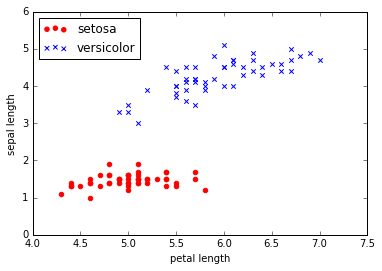

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

###### Implementation: Training

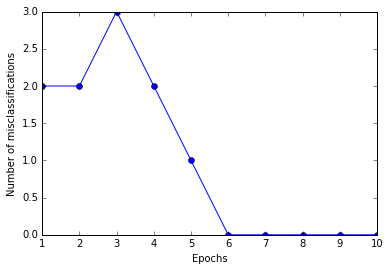

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

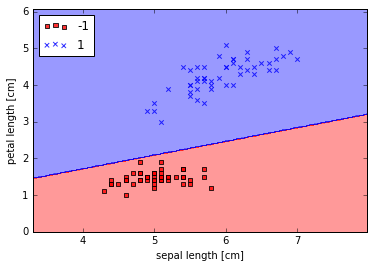

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### 2.2 Adaptive linear neurons

앞서 Perceptrons라는 single-layer neural network에 대해 살펴봤었다. 이번에는 Adaptive Linear Neuron이라는 또 다른 종류의 single-layer neural network에 대해 알아보겠다.

앞서 Perceptron에서는 아래와 같이 예측 오차($y^{(i)} - \hat{y}^{(i)}$)의 값에 따라 ( $\eta x_j^{(i)}$에 비례하여) weight들을 조절했었다. 즉 weight이 많이 잘못되서 예측이 틀린 경우나 weight이 조금 잘못되어 예측이 틀린 경우에나 ($\eta$와 $x_j^{(j)}$에 영향을 받기는 하지만) weight을 조절하는 양이 똑같았다. (즉 아래 식에서와 같이 단지 $y^{(i)}$와 $\hat{y}^{(i)}$를 비교하고 있음)


$$w_j := w_j + \eta ( y^{(i)} - \hat{y}^{(i)}) x_j^{(i)}$$

이보다는 weight이 많이 잘못된 경우 weight을 많이 조절하고, weight이 조금 잘못된 경우 weight을 조금만 조절하는 것이 보다 효율적이리라 생각할 수있다. 1960년 Bernard Widrow가 고안한 Adaline이라는 아이디어가 바로 이런 것이며, 앞서 Rosenblatt이 고안했던 Perceptrons를 개선한 것이라 할 수 있다.

결론적으로 Adaptive linear neurons에서는 아래와 같이 $y^{(i)}$와 $w_j x_j^{(j)}$를 비교하여 weight을 조절한다.
$$w_j := w_j + \eta ( y^{(i)} - w_j x_j^{(j)}) x_j^{(i)}$$

<img  src="./_images/01_adaline.PNG"/>

그렇다면 Adaptive linear neurons에서는 왜 weight을 저렇게 조절하겠다는 것일까? 조절의 방향(부호)와 크기는 어떻게 결정되는 것일까? Gradient descent를 통해 그에 대한 힌트를 얻어보자.

###### Gradient descent

Supervised learning에서 어떤 모형의 성능이 좋다는 것은 결국 예측값 $\hat{y}$과 실제값 $y$사이의 차이가 작다는 것이고, 좋은 모형을 만들기 위해서는 이 차이(error, cost)가 작도록 weight을 잘 정하면 되는 것이다. 

이 차이를 error 혹은 cost라고 부르며, 사용할 (training) dataset 전체의 error를 아래와 같이 Sum of Squared Error(SSE) function, $J(\mathbf{w})$로 정의할 수 있다. 이런 함수를 objective function, cost function, error function 등으로 부른다.

이는 $n$건의 data record에 대한 $n$개의 예측값 $\hat{y}^{(i)}$과 각각에 대응하는 $n$개의 실제값 $y^{(i)}$들의 차이를 구할 수 있고, 이 $n$개의 차이를 제곱하여 더한 것이다. 또한 계산 편의를 위해 $\frac{1}{2}$를 곱했다.    

물론 error 절대값의 합을 이용한다거나 weight들의 제곱합을 더하는 등 다른 방식의 cost function을 사용할수도 있다.

$$J(\mathbf{w}) = \frac{1}{2} \sum_i \left( y^{(i)} - \phi(z^{(i)})\right)^2$$

결국 예측과 실제의 차이를 어떤 함수로 나타낸 것이고, 이 함수값이 가장 작아지도록 함수내 파라미터를 조절하면 되는 것이다. 이런 연산을 **최적화(optimization)**라 하며, 그 과정을 머신러닝에서는 학습(learning, training) 이라 하며 통계학에서는 모수 추정(parameter estimation)이라 한다.

---

우리는 다양한 최적화 알고리즘 중 **Gradient descent**에 대해 알아볼 것이다.    

앞서 cost function $J(\mathbf{w})$에서 
$\phi(z^{(i)}) = w_0 x_0 + w_1 x_1 + \cdots + w_p x_p$인데,         
만약 변수 $x$가 하나만 존재하여 $w_1$만 있는 상황($\phi(z^{(i)}) = w_1 x_1$)을 가정하면     
$J(w)$는 아래와 같다. (편의를 위해 subscript ${}_{\_1}$은 생략)      
$$J(w) = \frac{1}{2} \sum_i \left( y^{(i)} - w x^{(i)}\right)^2$$


$y^{(i)}$와 $x^{(i)}$는 (데이터) 상수이므로      
위 식은 $w$에 대한 2차식이고    아래와 같이 그려볼 수 있다.

<img  src="./_images/02_gradient.PNG"/>

(위 그림에서는 한눈에 $J(w)$가 가장 작아지는 지점의 $w$와 그때의 $J_{min}(w)$를 쉽게 찾을 수 있으나, 변수의 수가 많아질 경우 cost function은 $w$에 대한 다차원 함수가 되므로 최소점을 찾는 것이 쉬운 문제가 아닐 수 있다.)

아무튼 위 예에서와 같이 현재의 $w$이 검은 공의 지점의 값일 경우 $J(w)$가 작아지기 위해서는 공을 아래로 굴려야 할 것인데, 그 방향은 검은 공에서 2차식의 기울기(부호)의 반대 방향이라 할 수 있고, 그 크기는 기울기 절대값 크기에 비례하도록 한다면 합리적일 것이다. (즉 그 점에서의 1차 미분의 크기에 비례하도록 weight을 줄이면 되는 것이다.)
$$w := w + \Delta w$$
$$\Delta w = -\eta \Delta J(\mathbf{W}) = -\eta \frac{\partial J(w)}{\partial w}$$

위에서 비례상수 $\eta$를 사용하는데, 이는 한번의 weight 수정시 얼마나 더 멀리 이동할 것인지를 결정한다. 그런데 이 값에 따라 학습이 잘 될 수도 있고 그렇지 않을 수도 있다. 예를들어 $\eta$가 너무 결국 최소점에 도달하겠지만 그 속도가 너무 느릴 것이고, $\eta$가 너무 클 경우 최소점 근처에 빨리 가겠지만 그 지점을 지나칠수도 있다.

<img  src="./_images/02_learning_rate.PNG"/>

앞서 제시한 것과 같이 $J(w)$의 $w$에 대한 편미분은 아래와 같은데

$$
\begin{align}
\frac{\partial J(w)}{\partial w} &= \frac{\partial}{\partial w}\{\frac{1}{2} \sum_i \left( y^{(i)} - w x^{(i)}\right)^2\}\\
&= - \frac{\partial}{\partial w} \sum_i \left( y^{(i)} - w x^{(i)}\right)x^{(i)}\\
\end{align}
$$

이는 결국 Adaptive linear neurons에서 weight들을 조절하는 방법과 같다.     $$w_j := w_j + \eta ( y^{(i)} - w_j x_j^{(j)}) x_j^{(i)}$$

###### Numpy matrix operations

Adaptive Linear Neuron의 Python 구현에 앞서 오래전에 배웠던 간단한 matrix 연산을 상기해보자.

$$\mathbf{w} = \begin{pmatrix}
0.1 \\
0.2 \\
0.3
\end{pmatrix}, ~~
\mathbf{X} = \begin{pmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{pmatrix}
$$

$$\mathbf{w}^T~ \mathbf{X} = \begin{pmatrix}
0.1 & 0.2 & 0.3 
\end{pmatrix}
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{pmatrix} = 
\begin{pmatrix}
2.2 \\
2.8
\end{pmatrix}
$$

In [13]:
import numpy as np
w = np.array([[0.1],[0.2], [0.3]], np.float)
print(w.shape)
w

(3, 1)


array([[ 0.1],
       [ 0.2],
       [ 0.3]])

In [14]:
X = np.array([[1, 2], [3, 4], [5, 6]], np.int32)
print(X.shape)
X

(3, 2)


array([[1, 2],
       [3, 4],
       [5, 6]])

In [15]:
w.T

array([[ 0.1,  0.2,  0.3]])

In [16]:
w.T.dot(X)

array([[ 2.2,  2.8]])

###### Implementation: Adaptive Linear Neuron

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            #transpose of [n by p matrix] times [n by 1 column vector]
            
            self.w_[0] += self.eta * errors.sum()
            
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

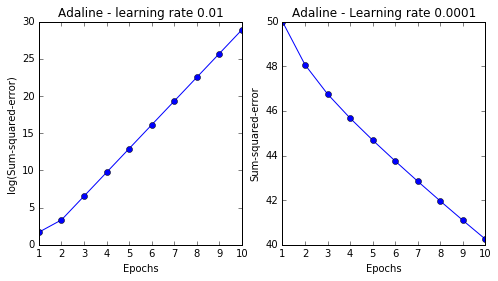

In [18]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

###### Feature scaling

사용하려는 데이터에 몇개의 변수가 있는데, 각 변수 값의 범위가 지나치게 상이한 경우 예를들어 $x_1$은 일간 구매건수로서 일반적으로 1에서 10사이의 값이고, $x_1$는 평균 구매 가격이라서  1000에서 100000 사이의 값인 경우

이 데이터를 바로 training에 사용할 경우 모형의 성능이 좋지 않거나 training 속도가 좋지 않을 수 있다. 이런 문제를 개선하기 위해 **feature scaling**을 하며 다양한 기법 중 **standardization**의 경우 아래와 같이 $x_j$를 $x^{'}_j$로 변환한다.   
(각 변수에서 평균을 빼고 표준편차로 나눠 정규분포 $N(0, 1)$로 변환.)

$$x^{'}_j = \frac{x_j - \mu_j}{\sigma_j}$$



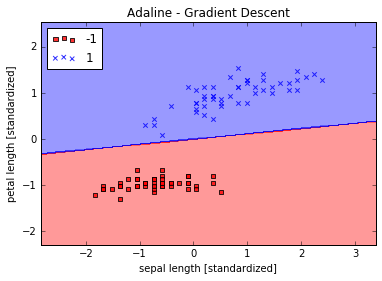

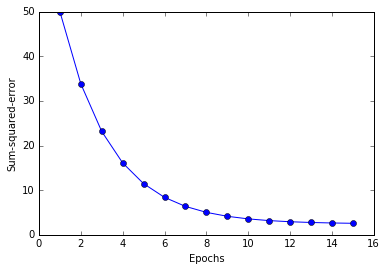

In [20]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

###### Large scale machine learning and stochastic gradient descent

To be continued..

.

###### Classification of Iris data using tensorflow

앞서 다뤘던 Perceptrons나 Adaline의 경우 single layer neural network이다.    
좀더 개선된 Neural network(Deep learning)으로 3개의 hidden layer를 포함하는 모형을 아래와 같이 tensorflow를 이용해 구현해볼 수 있다.    
(각 hidden layer마다 10개, 20개, 10개의 hidden unit을 포함하고 있다.)

In [21]:
# Reference: https://www.tensorflow.org/tutorials/tflearn/

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np

# Data sets
IRIS_TRAINING = "./_data/iris_training.csv"
IRIS_TEST = "./_data/iris_test.csv"

# Load datasets.
training_set = tf.contrib.learn.datasets.base.load_csv_with_header(
    filename=IRIS_TRAINING,
    target_dtype=np.int,
    features_dtype=np.float32)
test_set = tf.contrib.learn.datasets.base.load_csv_with_header(
    filename=IRIS_TEST,
    target_dtype=np.int,
    features_dtype=np.float32)

# Specify that all features have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]

# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 10],
                                            n_classes=3,
                                            model_dir="/tmp/iris_model")

# Fit model.
classifier.fit(x=training_set.data,
               y=training_set.target,
               steps=2000)

# Evaluate accuracy.
accuracy_score = classifier.evaluate(x=test_set.data,
                                     y=test_set.target)["accuracy"]
print('Accuracy: {0:f}'.format(accuracy_score))

# Classify two new flower samples.
new_samples = np.array(
    [[6.4, 3.2, 4.5, 1.5], [5.8, 3.1, 5.0, 1.7]], dtype=float)
y = list(classifier.predict(new_samples, as_iterable=True))
print('Predictions: {}'.format(str(y)))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_environment': 'local', '_task_id': 0, 'keep_checkpoint_max': 5, 'save_checkpoints_steps': None, 'keep_checkpoint_every_n_hours': 10000, '_is_chief': True, 'save_summary_steps': 100, '_num_ps_replicas': 0, 'save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000201BAC170F0>, '_task_type': None, 'tf_random_seed': None, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': ''}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and b

.